In [33]:
# Importing Essential libararies and supressing the warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [34]:
# Import the data and creating Backup

df = pd.read_csv('Groceries_dataset.csv')
df_backup = df

df.sample(6)

,Member_number,Date,itemDescription
12889,1343,05-10-2014,red/blush wine
24939,4049,06-07-2014,canned fish
23819,1110,15-11-2015,margarine
24453,1540,26-11-2015,fruit/vegetable juice
29842,4874,21-02-2014,bottled water
11190,3427,05-06-2014,meat


In [35]:
# Checking the data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [36]:
# Converting date to date datatype
# df['Date'] = pd.to_datetime('df['Date']') - Another way of doing it.
df['Date'] = df['Date'].astype('datetime64[ns]')

In [37]:
# Checking the null values
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [40]:
# Distribution of items sold
Item_Distribution = df.groupby(by = 'itemDescription').size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False)
Item_Distribution.head()

,itemDescription,Frequency
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334


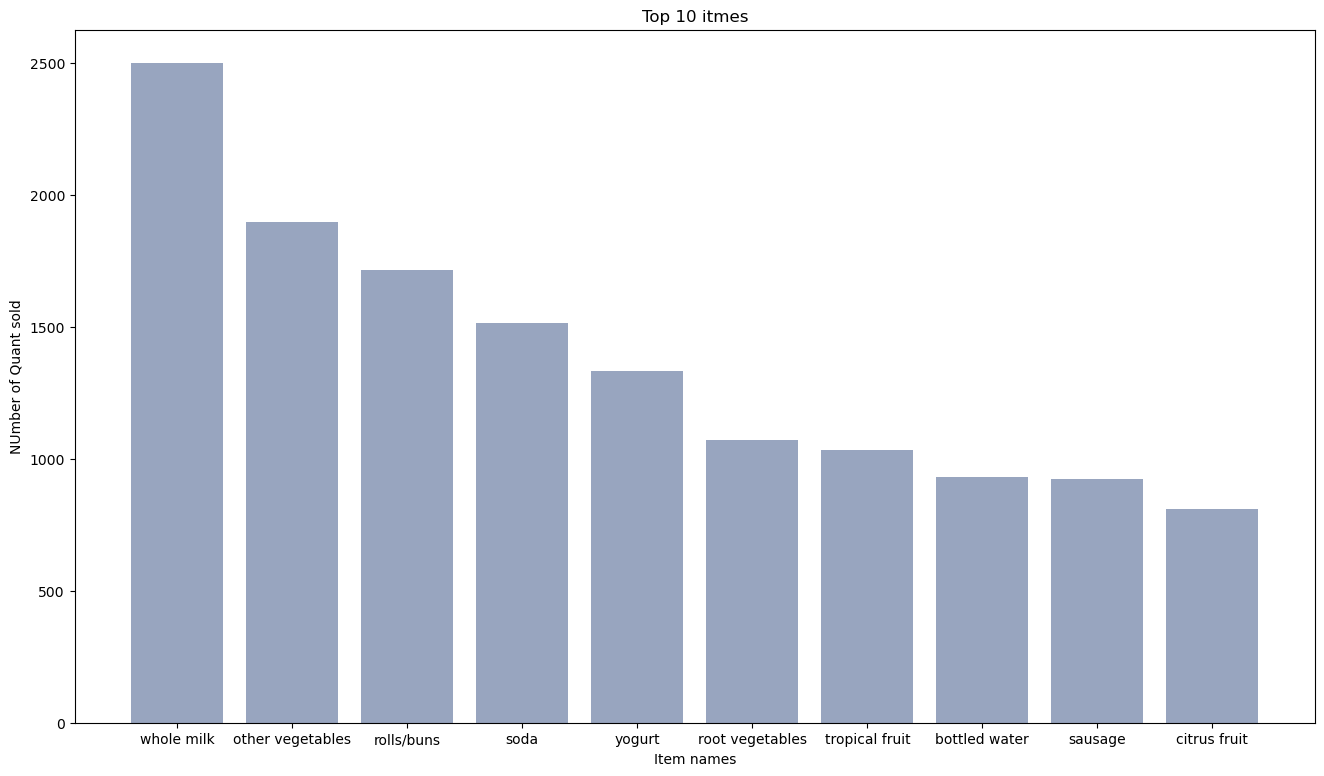

In [42]:
#Plotting bargraph

Bars = Item_Distribution['itemDescription'].head(10)
Height = Item_Distribution['Frequency'].head(10)
x_pos = np.arange(len(Bars))


plt.figure(figsize=(16,9))

plt.bar(x_pos,Height,color=(0.2,0.3,0.5,0.5))

plt.title('Top 10 itmes')
plt.xlabel('Item names')
plt.ylabel('NUmber of Quant sold')

plt.xticks(x_pos,Bars)
plt.show()

In [44]:
# Setting date as index
df_date = df.set_index(['Date'])
df_date.head()

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk


[Text(0.5, 0, 'date'), Text(0, 0.5, 'number of item sold')]

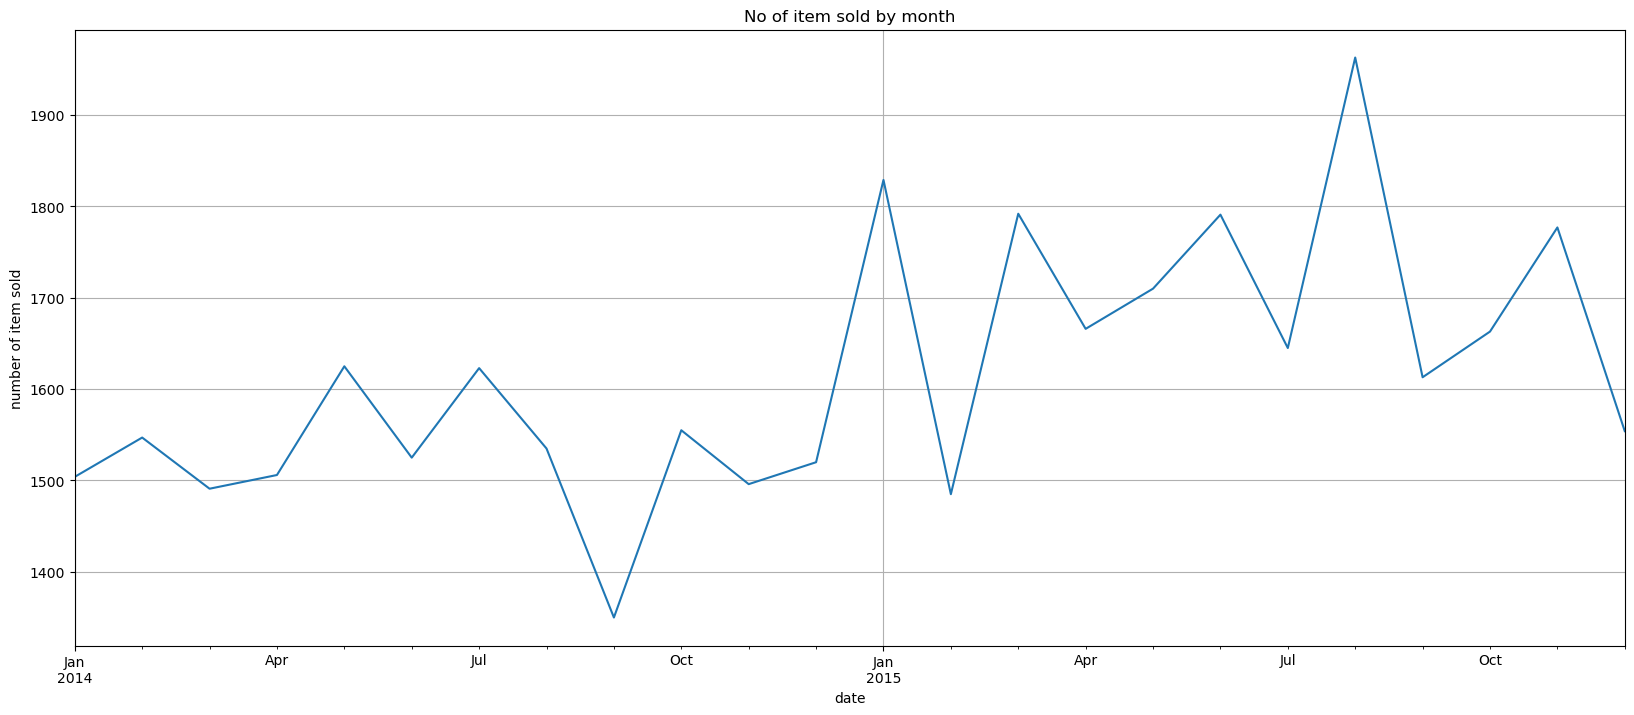

In [45]:
# Plotting line graph.
df_date.resample('M')['itemDescription'].count().plot(figsize = (20,8), grid = True, title = 'No of item sold by month').set(xlabel = 'date',ylabel='number of item sold')                                                   

In [85]:
# Selecting data required for modelling and removing white space from the code.
cust_level = df[["Member_number","itemDescription",]].sort_values(by  = 'Member_number', ascending= False)
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [90]:
# Combine all customer in the list format

Transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]

In [98]:
# Model Creation 
from apyori import apriori
rules = apriori(transactions =Transactions,min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2)

In [99]:
results = list(rules)

In [100]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [results[1] for result in results]
    confidences =[result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs,rhs,supports,confidences,lifts))
results_in_dataframe = pd.DataFrame(inspect(results),columns = ['Left Hand Side','Right Hand side','Support','confidences','lift'])

In [102]:
results_in_dataframe.nlargest(n=10, columns='lift').reset_index()

,index,Left Hand Side,Right Hand side,Support,confidences,lift
0,4915,berries,pip fruit,"((beef, potato products), 0.002565418163160595...",0.105263,14.654135
1,4914,berries,pip fruit,"((beef, potato products), 0.002565418163160595...",0.105263,12.068111
2,2674,beef,other vegetables,"((beef, potato products), 0.002565418163160595...",0.242424,11.524021
3,3573,brown bread,specialty chocolate,"((beef, potato products), 0.002565418163160595...",0.073394,11.443670
4,4133,long life bakery product,meat,"((beef, potato products), 0.002565418163160595...",0.148148,11.105413
5,3290,bottled water,sausage,"((beef, potato products), 0.002565418163160595...",0.150943,10.322410
6,2904,bottled beer,rolls/buns,"((beef, potato products), 0.002565418163160595...",0.097826,9.533152
7,5045,meat,pastry,"((beef, potato products), 0.002565418163160595...",0.135593,9.438257
8,2902,bottled beer,domestic eggs,"((beef, potato products), 0.002565418163160595...",0.086957,9.415459
9,2734,berries,brown bread,"((beef, potato products), 0.002565418163160595...",0.118421,9.232105
